# Monte Carlo Model for SPY Prices

This notebook introduces the Geometric Brownian Motion (GBM) model
used to simulate future price paths of the SPY ETF.


## Geometric Brownian Motion (GBM)

The Geometric Brownian Motion (GBM) is a continuous-time stochastic process
commonly used to model asset prices in finance.

The model was introduced in the early 20th century and formally developed
in the 1960s by Paul Samuelson, building on the mathematical work of
Louis Bachelier, one of the pioneers of modern financial mathematics.

GBM was designed to capture two key features of asset prices:
- Randomness in price movements
- Proportional (relative) price changes rather than absolute ones

Today, GBM remains a foundational model in quantitative finance.
It is widely used for:
- Option pricing (e.g. Black–Scholes framework)
- Monte Carlo simulations
- Risk analysis and stress testing
- Educational and benchmarking purposes

Despite its simplicity and unrealistic assumptions (such as **constant
volatility**), GBM is still used as a first-order approximation due to its
analytical tractability and intuitive interpretation.


It is defined by the following stochastic differential equation:

**dS_t = μ S_t dt + σ S_t dW_t**


Where:
- S_t is the stock price
- dt is a small time variation
- dS_t is the price variation
- μ is the expected return (drift)
- σ is the volatility
- W_t is a standard Brownian motion, whose increments follow a normal distribution with mean 0 and variance proportional to time.


## Model Assumptions

The GBM model relies on the following assumptions:

- Returns are log-normally distributed  
  (This implies that prices remain strictly positive and that returns are modeled in relative terms.)

- Volatility is constant over the simulation horizon  
  (This simplifies the model but ignores volatility clustering observed in real markets.)

- No arbitrage opportunities  
  (The model assumes that prices evolve in a way that prevents riskless profit.)

- Markets are frictionless  
  (Transaction costs, taxes and liquidity constraints are ignored.)


## Why setting μ = 0

For short-term risk analysis, the drift component μ has a limited impact
compared to volatility.

Setting μ = 0 allows us to focus purely on downside risk and dispersion
of outcomes rather than directional market views.

## The Brownian Motion Term ( W_t )

The term W_t represents a standard Brownian motion, which introduces
randomness into the price dynamics.

By definition, the Brownian motion starts at zero : W_0 = 0

Over time, its increments ( W_{t+dt} - W_t ) are:
- normally distributed with mean 0
- independent across time
- with variance equal to the time increment ( dt )

In practice, the Brownian motion is constructed by summing small random
Gaussian shocks scaled by the square root of the time increment. This ensures
that uncertainty increases with time, reflecting the unpredictable nature
of financial markets.



## Time Horizon

The model is applied over a short-term horizon (e.g. 1 month),
which is consistent with risk measurement rather than long-term forecasting.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

On passe de l'équation : **dS_t = μ S_t dt + σ S_t dW_t**

A celle ci : **S_t+1 = S_t x exp((μ-0.5x𝜎^2)xdt + 𝜎xZ_txsqrt(dt))**

avec Z_t*sqrt(dt) = W_t+dt - W_t

Preuve par lemme d'Ito : **df = f'(S_t)xdS_t + 0.5xf''(S_t)xS_t^2**

In [2]:
def simulate_gbm(S0, sigma, T, N, n_sims, mu=0):
    dt = T / N
    prices = np.zeros((N + 1, n_sims))
    prices[0] = S0

    for t in range(1, N + 1):
        Z = np.random.standard_normal(n_sims)
        prices[t] = prices[t - 1]*np.exp((mu -0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)
    return prices

In [3]:
S0 = 100 # prix de l'actif simulé
sigma = 0.2 # volatilité de 20%
T = 1/12 # 1 mois
N = 21 # jours de trading
n_sims = 20
paths = simulate_gbm(S0, sigma, T, N, n_sims)

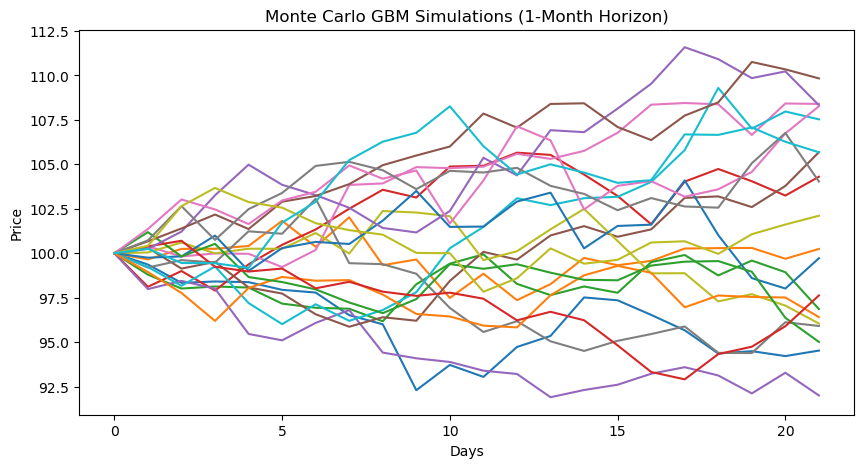

In [4]:
# Test de Monte Carlo Geometric Brownian Motion
plt.figure(figsize=(10,5))
plt.plot(paths)
plt.title("Monte Carlo GBM Simulations (1-Month Horizon)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

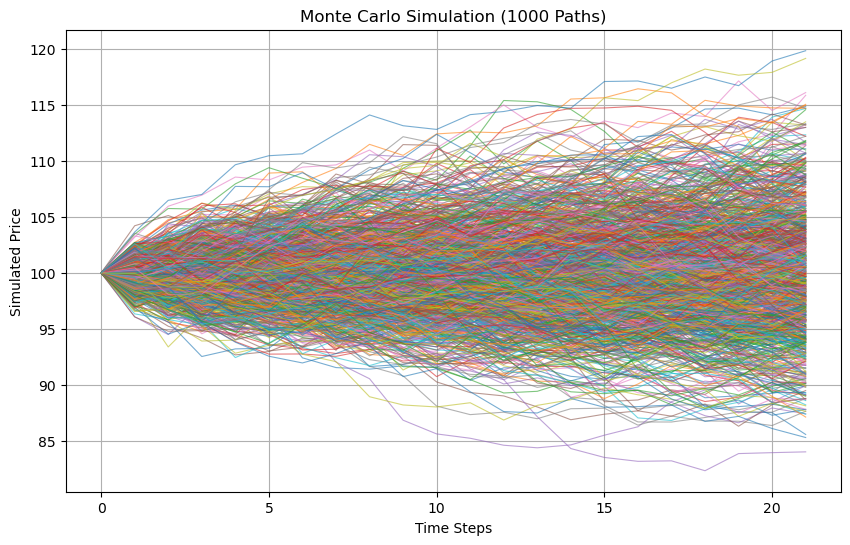

In [5]:
# Projet
n_sims = 1000  

plt.figure(figsize=(10,6))
plt.plot(simulate_gbm(S0, sigma, T, N, n_sims), linewidth=0.8, alpha=0.6)
plt.title("Monte Carlo Simulation (1000 Paths)")
plt.xlabel("Time Steps")
plt.ylabel("Simulated Price")
plt.grid(True)

plt.savefig("../figures/monte_carlo_1000_paths.png")
plt.show()